Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
                                              0.0/1.0 MB ? eta -:--:--
     -                                        0.0/1.0 MB 1.3 MB/s eta 0:00:01
     -                                        0.0/1.0 MB 326.8 kB/s eta 0:00:03
     ---                                      0.1/1.0 MB 581.0 kB/s eta 0:00:02
     -----                                    0.1/1.0 MB 711.9 kB/s eta 0:00:02
     --------                                 0.2/1.0 MB 831.5 kB/s eta 0:00:01
     -----------                              0.3/1.0 MB 983.9 kB/s eta 0:00:01
     ------------                             0.3/1.0 MB 967.8 kB/s eta 0:00:01
     --------------                           0.4/1.0 MB 1.0 MB/s eta 0:00:01
     -----------------     

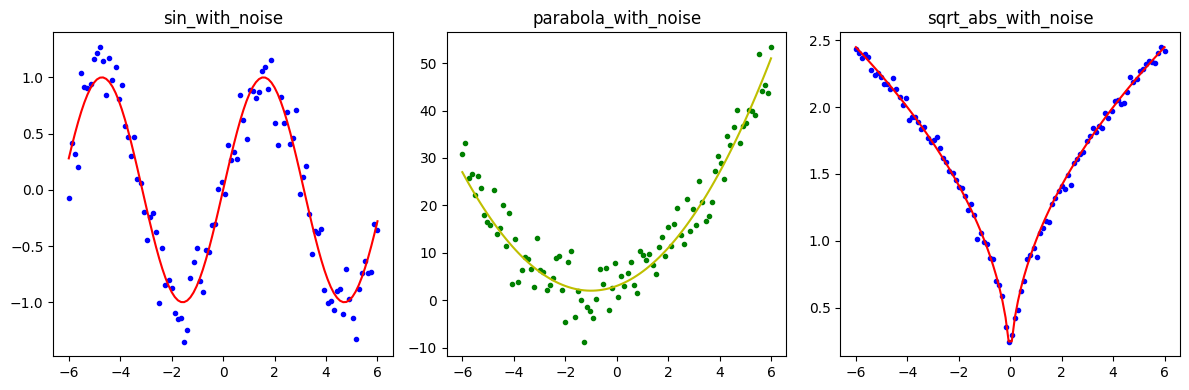

In [1]:
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

def add_noise_sin(x, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sin(x) + noise

def add_noise_parabola(x, a, b, c, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return a*x**2 + b*x + c + noise


def add_noise_sqrt_abs(y, sigma): 
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sqrt(np.abs(y)) + noise

# График 1
sigma = 0.4
x = np.linspace(-6, 6, 100)
y = add_noise_sin(x, sigma)

fig, axs = plt.subplots(1, 3, figsize=(12,4))

axs[0].plot(x, y, 'b.')
axs[0].plot(x, np.sin(x), 'r-')
axs[0].set_title("sin_with_noise")

# График 2
x = np.linspace(-6, 6, 100)
sigma = 2
y = add_noise_parabola(x, 1, 2, 3, sigma)
parab_clean = add_noise_parabola(x, 1, 2, 3, 0)

axs[1].plot(x, y, 'g.')
axs[1].plot(x, parab_clean, 'y-')
axs[1].set_title("parabola_with_noise")

# График 3
sigma = 0.2
x = np.linspace(-6, 6, 100)
y = add_noise_sqrt_abs(x, sigma)
y_clean = np.sign(y) * np.sqrt(np.abs(x))

axs[2].plot(x, y, 'b.')
axs[2].plot(x, y_clean, 'r-')
axs[2].set_title("sqrt_abs_with_noise")

plt.tight_layout()
plt.show()


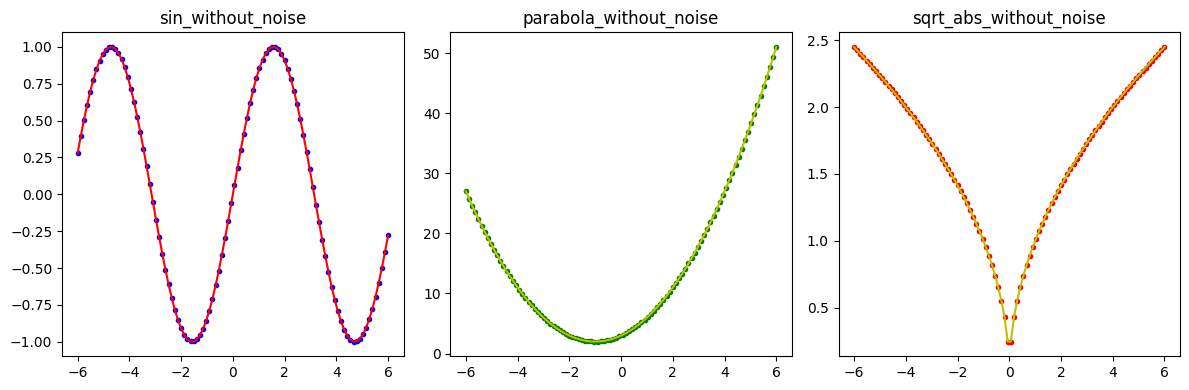

In [ ]:
def add_no_noise_sin(x, sigma):
    return np.sin(x)
def add_no_noise_parabola(x, a, b, c, sigma):
    return a*x**2 + b*x + c
def add_no_noise_sqrt_abs(y, sigma):
    return np.sqrt(np.abs(y))
# График 1
sigma = 0.4
x = np.linspace(-6, 6, 100)
y = add_no_noise_sin(x, sigma)
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].plot(x, y, 'b.')
axs[0].plot(x, np.sin(x), 'r-')
axs[0].set_title("sin_without_noise")
# График 2
x = np.linspace(-6, 6, 100)
sigma = 2
y = add_no_noise_parabola(x, 1, 2, 3, sigma)
parab_clean = 1*x**2 + 2*x + 3
axs[1].plot(x, y, 'g.')
axs[1].plot(x, parab_clean, 'y-')
axs[1].set_title("parabola_without_noise")
# График 3
sigma = 0.2
x = np.linspace(-6, 6, 100)
y = add_no_noise_sqrt_abs(x, sigma)
y_clean = np.sign(y) * np.sqrt(np.abs(x))
axs[2].plot(x, y, 'r.')
axs[2].plot(x, y_clean, 'y-')
axs[2].set_title("sqrt_abs_without_noise")
plt.tight_layout()
plt.show()

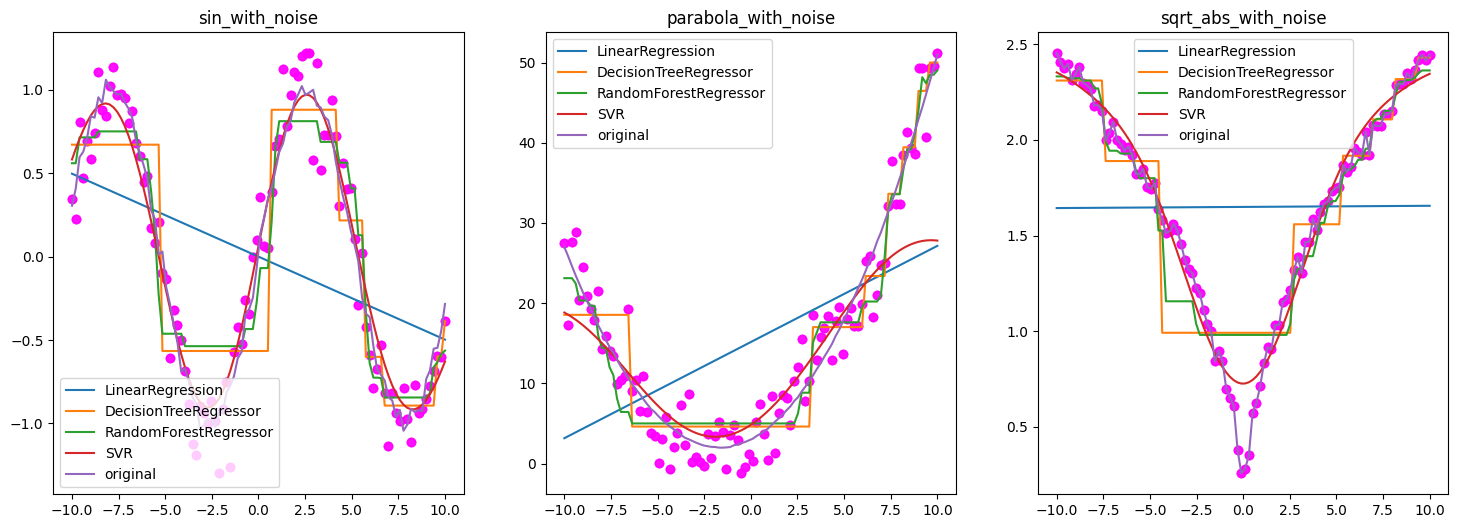

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))
def add_noise_sin(x, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sin(x) + noise
def add_noise_parabola(x, a, b, c, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return a*x**2 + b*x + c + noise

def add_noise_sqrt_abs(x, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sqrt(np.abs(x)) + noise
datasets = {
    "sin_with_noise": (np.linspace(-10, 10, 100), add_noise_sin(np.linspace(-6, 6, 100), 0.4)),
    "parabola_with_noise": (np.linspace(-10, 10, 100), add_noise_parabola(np.linspace(-6, 6, 100), 1, 2, 3, 2)),
    "sqrt_abs_with_noise": (np.linspace(-10, 10, 100), add_noise_sqrt_abs(np.linspace(-6, 6, 100), 0.2))
}
regressors = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=3),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=10, max_depth=3),
    "SVR": SVR(kernel="rbf", C=1.0, epsilon=0.1)
}
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    for regressor_name, regressor in regressors.items():
        regressor.fit(X.reshape(-1, 1), y)
        y_pred = regressor.predict(X.reshape(-1, 1))
        ax = axes[i]
        if regressor_name == "LinearRegression":
            ax.plot(X, y_pred, label=regressor_name)
        elif regressor_name == "DecisionTreeRegressor":
            ax.plot(X, y_pred, label=regressor_name)
        elif regressor_name == "RandomForestRegressor":
            ax.plot(X, y_pred, label=regressor_name)
        elif regressor_name == "SVR":
            ax.plot(X, y_pred, label=regressor_name)
        ax.scatter(X, y, color='magenta', alpha=0.5)
        ax.set_title(data_name)
        ax.legend()
    if data_name == "sin_with_noise":
        ax.plot(X, add_noise_sin(x, 0.2), label="original")
    elif data_name == "parabola_with_noise":
           ax.plot(X, add_noise_parabola(x, 1, 2, 3, 0.2), label="original")
    elif data_name == "sqrt_abs_with_noise":
           ax.plot(X, y, label="original")
    ax.legend()

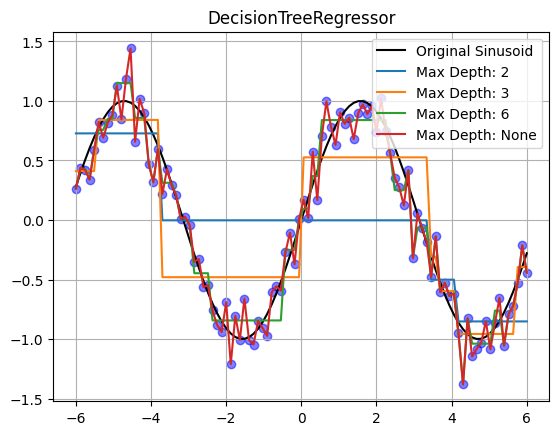

In [ ]:
def add_noise_sin(x, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sin(x).ravel() + noise
X = np.linspace(-6, 6, 100).reshape(-1, 1)
y = add_noise_sin(X, 0.4)
np.random.seed(2023)
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, np.sin(X), label='Original Sinusoid', color='black')
for max_depth in [2, 3, 6, None]:
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    plt.plot(X, y_pred, label=f'Max Depth: {max_depth}')
plt.grid()
plt.title('DecisionTreeRegressor')
plt.legend()
plt.show() 

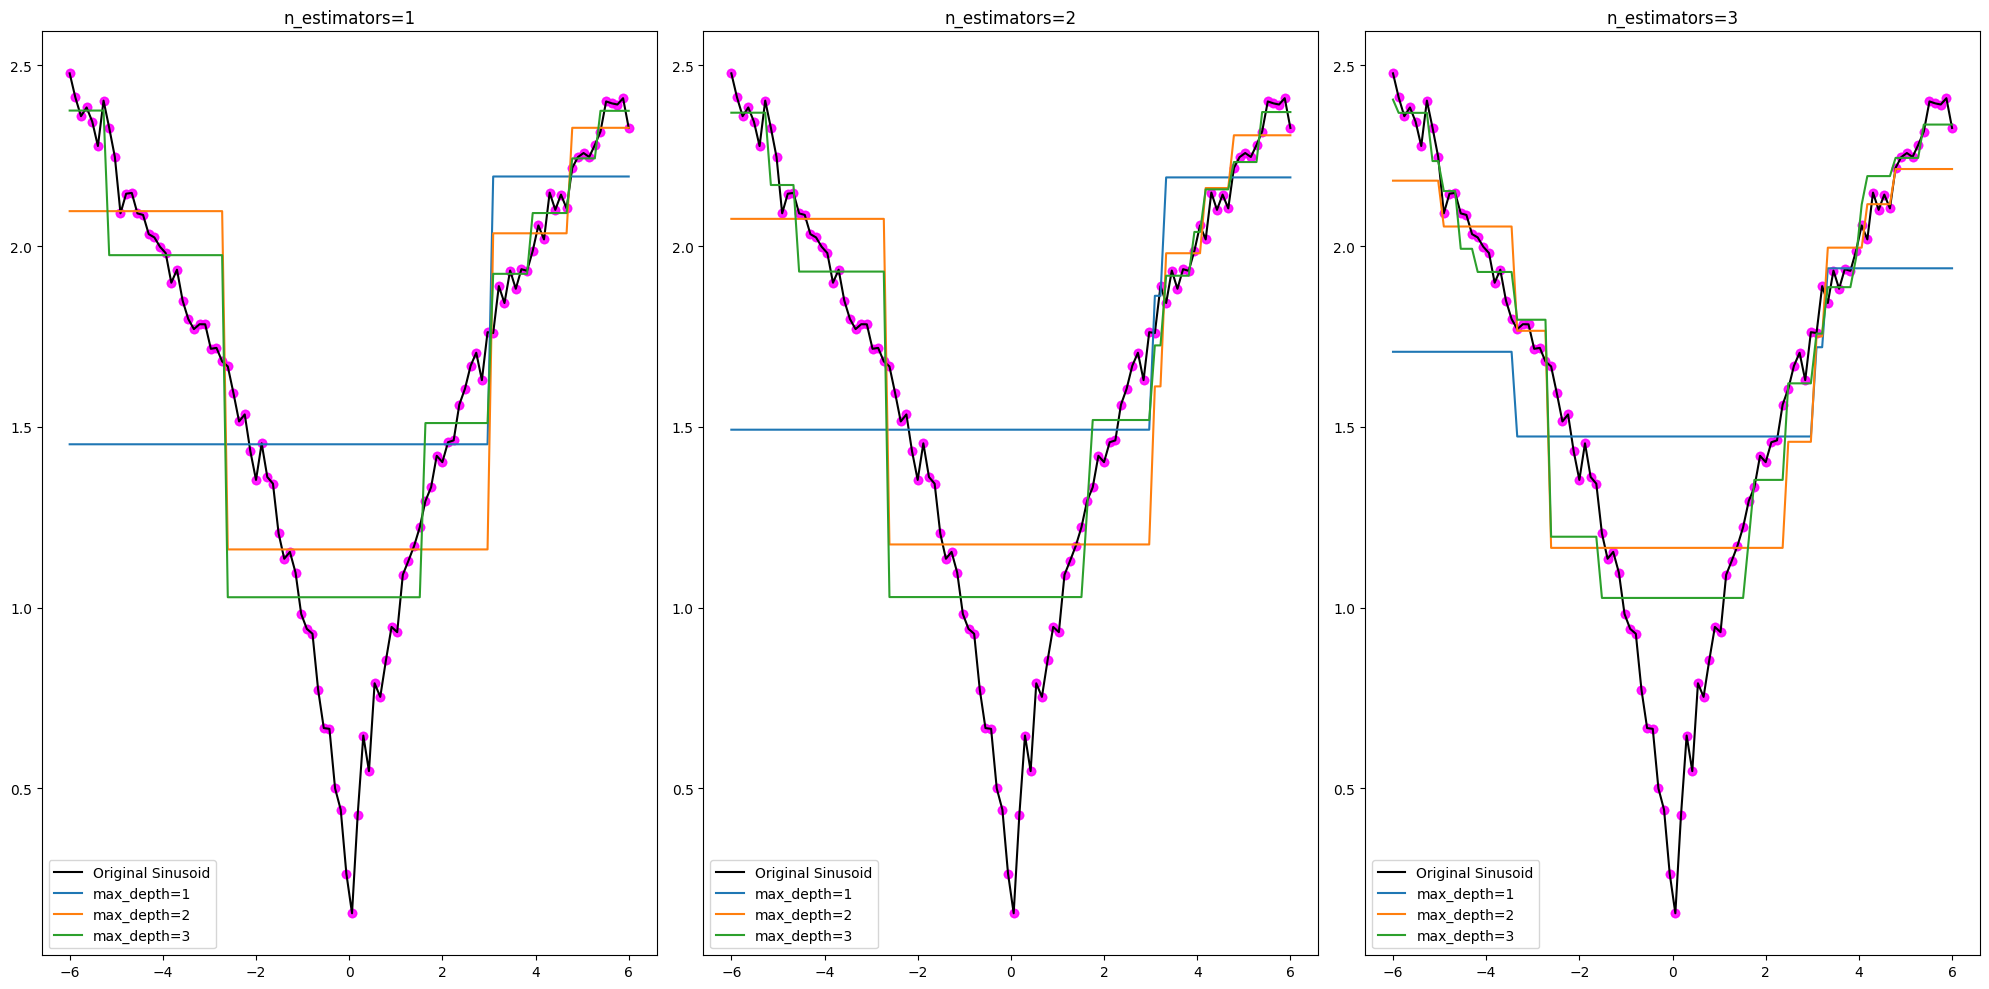

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
def add_noise_sqrt_abs(x, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sqrt(np.abs(x)) + noise
# Генерация обучающих данных
X = np.linspace(-6, 6, 100).reshape(-1, 1)
y = add_noise_sqrt_abs(np.linspace(-6, 6, 100), 0.2)
np.random.seed(2023)
# Задание значений параметров модели случайного леса
n_estimators_values = [1, 2, 3]
max_depth_values = [1, 2, 3]
# Построение графиков
# Построение графиков
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
# Отображение оригинального синусоида на каждом графике
for ax in axs:
    ax.plot(X, y, label='Original Sinusoid', color='black')
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_depth in enumerate(max_depth_values):
        # Обучение модели случайного леса
        regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=2023)
        regressor.fit(X, y)
        # Предсказание модели
        y_pred = regressor.predict(X)
        # Отображение результатов на графике
        axs[i].scatter(X, y, color='magenta', alpha=0.5)
        axs[i].plot(X, y_pred, label=f'max_depth={max_depth}')
        axs[i].set_title(f'n_estimators={n_estimators}')
        axs[i].legend()
plt.tight_layout()
plt.show()






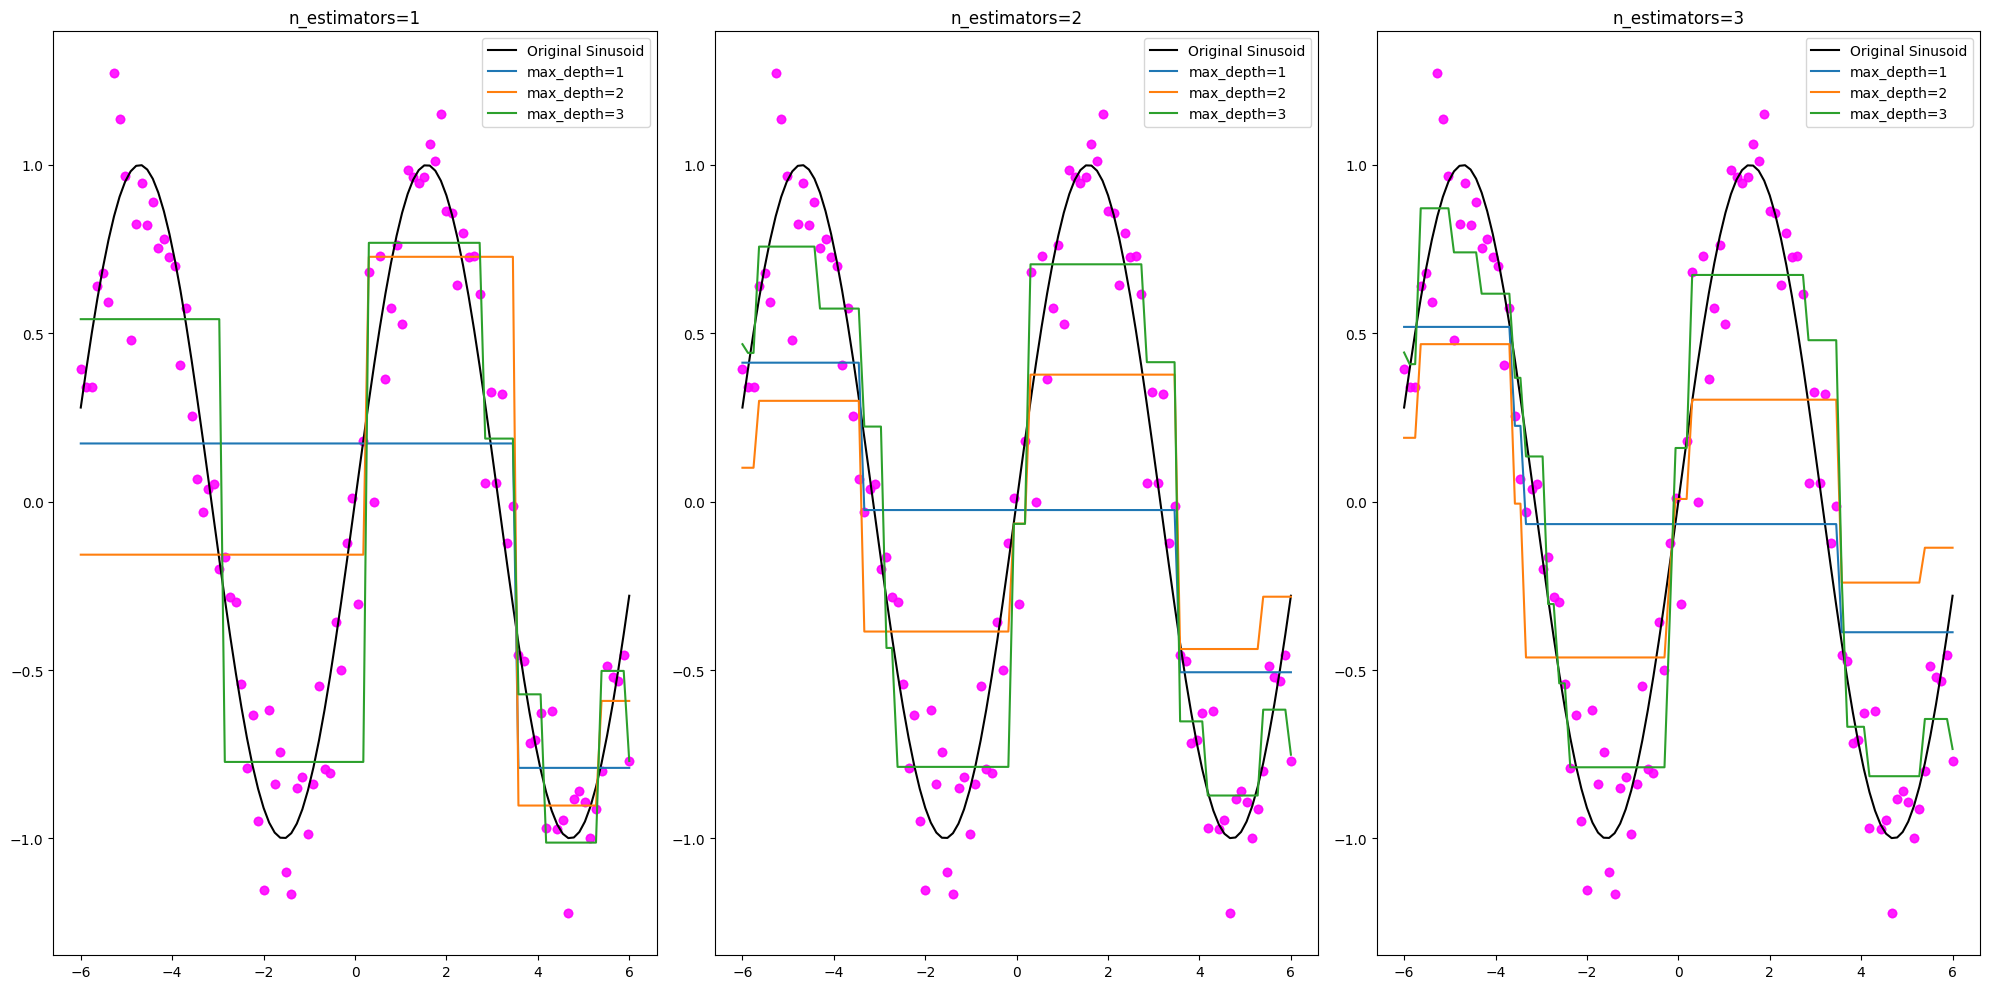

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
def add_noise_sin(x, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sin(x).ravel() + noise
# Генерация обучающих данных
X = np.linspace(-6, 6, 100).reshape(-1, 1)
y = add_noise_sin(X, 0.4)
np.random.seed(2023)
# Задание значений параметров модели случайного леса
n_estimators_values = [1, 2, 3]
max_depth_values = [1, 2, 3]
# Построение графиков
# Построение графиков
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
# Отображение оригинального синусоида на каждом графике
for ax in axs:
    ax.plot(X, np.sin(X), label='Original Sinusoid', color='black')
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_depth in enumerate(max_depth_values):
        # Обучение модели случайного леса
        regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=2023)
        regressor.fit(X, y)
        # Предсказание модели
        y_pred = regressor.predict(X)
        # Отображение результатов на графике
        axs[i].scatter(X, y, color='magenta', alpha=0.5)
        axs[i].plot(X, y_pred, label=f'max_depth={max_depth}')
        axs[i].set_title(f'n_estimators={n_estimators}')
        axs[i].legend()
plt.tight_layout()
plt.show()

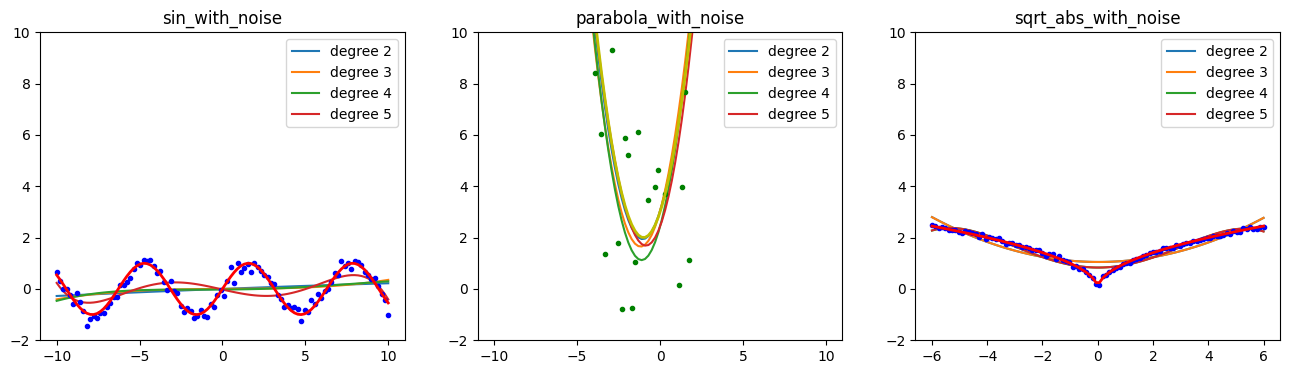

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def add_noise_sin(x, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sin(x) + noise
def add_noise_parabola(x, a, b, c, sigma):
    noise = np.random.normal(0, sigma**2, len(x))
    return a*x**2 + b*x + c + noise
def add_noise_sqrt_abs(x, sigma): 
    noise = np.random.normal(0, sigma**2, len(x))
    return np.sqrt(np.abs(x)) + noise
# Generate data
sigma = 0.4
x1 = np.linspace(-10, 10, 100)
y1 = add_noise_sin(x1, sigma)
np.random.seed(2023)
sigma = 2
x2 = np.linspace(-10, 10, 100)
y2 = add_noise_parabola(x2, 1, 2, 3, sigma)
parab_clean = add_noise_parabola(x2, 1, 2, 3, 0)
sigma = 0.2
x3 = np.linspace(-6, 6, 100)
y3 = add_noise_sqrt_abs(x3, sigma)
y3_clean = np.sign(y3) * np.sqrt(np.abs(x3))
# Polynomial Features and Linear Regression pipeline
def polynomial_regression(x, y, degree):
    # create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    # fit linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    # predict on training data
    y_pred = lin_reg.predict(X_poly)
    return y_pred
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(16,4))
# sin_with_noise
for degree in range(2, 6):
    y_pred = polynomial_regression(x1, y1, degree)
    axs[0].plot(x1, y_pred, label=f'degree {degree}')
axs[0].plot(x1, y1, 'b.')
axs[0].plot(x1, np.sin(x1), 'r-', linewidth=2)
axs[0].set_title("sin_with_noise")
axs[0].legend()
axs[0].set_ylim(-2, 10) # установить пределы оси y
# parabola_with_noise
for degree in range(2, 6):
    y_pred = polynomial_regression(x2, y2, degree)
    axs[1].plot(x2, y_pred, label=f'degree {degree}')
axs[1].plot(x2, y2, 'g.')
axs[1].plot(x2, parab_clean, 'y-', linewidth=2)
axs[1].set_title("parabola_with_noise")
axs[1].legend()
axs[1].set_ylim(-2, 10) # установить пределы оси y
# sqrt_abs_with_noise
for degree in range(2, 6):
    y_pred = polynomial_regression(x3, y3, degree)
    axs[2].plot(x3, y_pred, label=f'degree {degree}')
axs[2].plot(x3, y3, 'b.')
axs[2].plot(x3, y3_clean, 'r-', linewidth=2)
axs[2].set_title("sqrt_abs_with_noise")
axs[2].legend()
axs[2].set_ylim(-2, 10) # установить пределы оси y
plt.show()